In [ ]:
##################################################################################
#         U B E R   Y   O T R O S   S E R V I C I O S                            #
#                                                                                #
#                       Análisis de datos                                        #
##################################################################################

In [2]:
# Carga de librerias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
df_travels_ubers_2014_clean = pd.read_csv('Dataset_UberViajes_limpio.csv', index_col=0)

df_travels_ubers_2014_clean.head()

e:\users\dmorga\miniconda3\envs\bedu_ambiente\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,Fecha,Latitud,Longitud,id_base,DiaSemana,DiaSemanaNum,Anio,Mes,Dia,Hora,Minuto
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,Lunes,1,2014,4,1,0,11
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,Lunes,1,2014,4,1,0,17
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,Lunes,1,2014,4,1,0,21
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,Lunes,1,2014,4,1,0,28
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,Lunes,1,2014,4,1,0,33


In [24]:
# Graficación de viajes acumulados por bases
df_travels_abril_sum_bases = df_travels_ubers_2014_clean.groupby('id_base').size()
df_travels_abril_sum_bases.sort_values(ascending=False)

id_base
B02617    1458853
B02598    1393113
B02682    1212789
B02764     263899
B02512     205673
dtype: int64

Text(0, 0.5, 'Total')

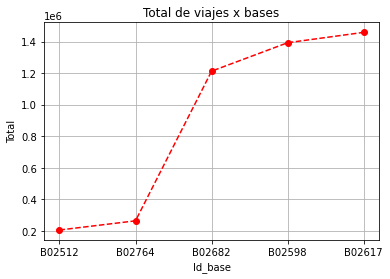

In [39]:
plt.plot(df_travels_abril_sum_bases.sort_values(ascending=True), marker='o', linestyle='--', color='r')
plt.title("Total de viajes x bases") 
plt.grid(True) 
plt.xlabel("Id_base")
plt.ylabel("Total") 

In [6]:
# Graficación de viajes acumulados por bases y por mes
crosstab = pd.crosstab(df_travels_ubers_2014_clean['id_base'], df_travels_ubers_2014_clean['Mes'])
crosstab


Mes,4,5,6,7,8,9
id_base,,,,,,
B02512,35536,36765,32509,35021,31472,34370
B02598,183263,260549,242975,245597,220129,240600
B02617,108001,122734,184460,310160,355803,377695
B02682,227808,222883,194926,196754,173280,197138
B02764,9908,9504,8974,8589,48591,178333


In [18]:
crosstab.loc['B02512']

Mes
4    35536
5    36765
6    32509
7    35021
8    31472
9    34370
Name: B02512, dtype: int64

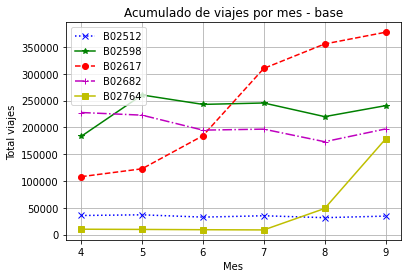

In [37]:
plt.plot(crosstab.loc['B02512'], marker='x', linestyle=':', color='b', label = 'B02512')   
plt.xlabel("Mes")                              
plt.ylabel("Total viajes")                      
plt.plot(crosstab.loc['B02598'], marker='*', linestyle='-',  color='g', label = 'B02598') 
plt.plot(crosstab.loc['B02617'], marker='o', linestyle='--', color='r', label = 'B02617') 
plt.plot(crosstab.loc['B02682'], marker='+', linestyle='-.', color='m', label = 'B02682') 
plt.plot(crosstab.loc['B02764'], marker='s', linestyle='-',  color='y', label = 'B02764')               
plt.title("Acumulado de viajes por mes - base")   
plt.grid(True) 
plt.legend(loc="upper left")
plt.show()   


In [4]:
# Graficación de viajes acumulados por mes
df_travels_abril_sum_mes = df_travels_ubers_2014_clean.groupby('Mes').size()
df_travels_abril_sum_mes.sort_values(ascending=False)

Mes
9    1028136
8     829275
7     796121
6     663844
5     652435
4     564516
dtype: int64

e:\users\dmorga\miniconda3\envs\bedu_ambiente\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


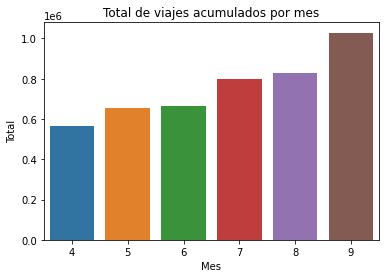

In [5]:
ax = sns.barplot(df_travels_abril_sum_mes.index, df_travels_abril_sum_mes)
ax.set_title('Total de viajes acumulados por mes')
ax.set(xlabel='Mes', ylabel = 'Total');

In [48]:
# Graficación de viajes acumulados por dia de semana
df_travels_abril_sum_diasem = df_travels_ubers_2014_clean.groupby('DiaSemana').size()
df_travels_abril_sum_diasem.sort_values(ascending=False)

DiaSemana
Miercoles    755145
Jueves       741139
Martes       696488
Lunes        663789
Viernes      646114
Domingo      541472
Sabado       490180
dtype: int64

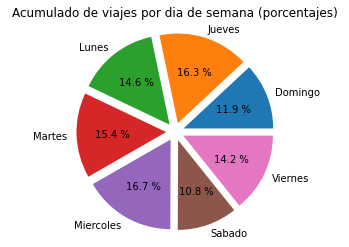

In [56]:
desfase = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)
plt.pie(df_travels_abril_sum_diasem, labels=df_travels_abril_sum_diasem.index, autopct="%0.1f %%", explode=desfase)
plt.axis("equal")
plt.title("Acumulado de viajes por dia de semana (porcentajes)") 
plt.show()

In [50]:
# Graficación de viajes acumulados por hora
df_travels_abril_sum_hora = df_travels_ubers_2014_clean.groupby('Hora').size()
df_travels_abril_sum_hora.sort_values(ascending=False)

Hora
17    336190
18    324679
16    313400
19    294513
20    284604
21    281460
15    275466
22    241858
14    230625
13    195877
7     193094
8     190504
12    170452
23    169190
11    165703
9     159967
10    159148
6     143213
0     103836
5      83939
1      67227
4      55230
3      48287
2      45865
dtype: int64

Text(0.5, 1.0, 'Acumulado de viajes por hora')

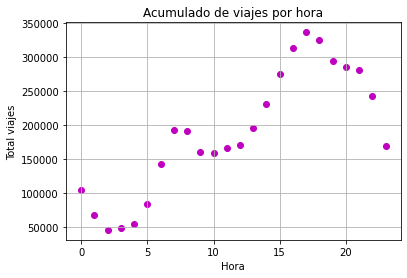

In [54]:
plt.scatter(df_travels_abril_sum_hora.index, df_travels_abril_sum_hora, c= 'm')
plt.grid(True) 
plt.xlabel("Hora")                              
plt.ylabel("Total viajes")
plt.title("Acumulado de viajes por hora") 

In [58]:
# Matriz de correlaciones
df_travels_ubers_2014_clean_filtered = df_travels_ubers_2014_clean.drop(columns=['Fecha', 'Anio', 'id_base', 'DiaSemana'])

In [59]:
df_travels_ubers_2014_clean_filtered.corr()

,Latitud,Longitud,DiaSemanaNum,Mes,Dia,Hora,Minuto
Latitud,1.000000,0.032479,-0.050430,-0.013094,-0.003407,-0.005049,-0.001060
Longitud,0.032479,1.000000,0.016315,0.032918,0.004835,-0.010542,-0.002286
DiaSemanaNum,-0.050430,0.016315,1.000000,0.011480,0.024662,-0.016212,-0.002131
Mes,-0.013094,0.032918,0.011480,1.000000,-0.012169,-0.023945,-0.002247
Dia,-0.003407,0.004835,0.024662,-0.012169,1.000000,-0.003326,-0.000186
Hora,-0.005049,-0.010542,-0.016212,-0.023945,-0.003326,1.000000,-0.011213
Minuto,-0.001060,-0.002286,-0.002131,-0.002247,-0.000186,-0.011213,1.000000


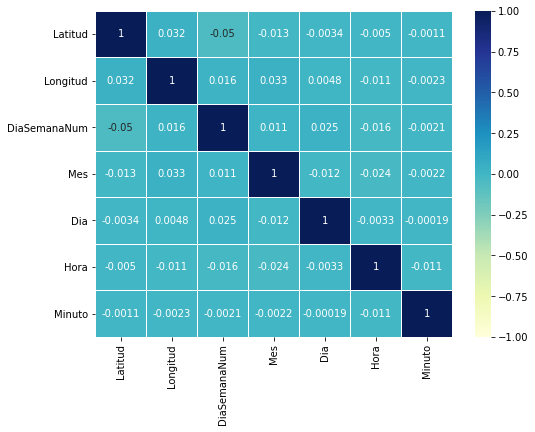

In [60]:
#1. Vuelve a generar tu matriz de correlaciones para tenerla disponible
plt.figure(figsize=(8, 6))
ax = sns.heatmap(df_travels_ubers_2014_clean_filtered.corr(), vmin=-1, vmax=1, annot=True, cmap="YlGnBu", linewidths=.5);

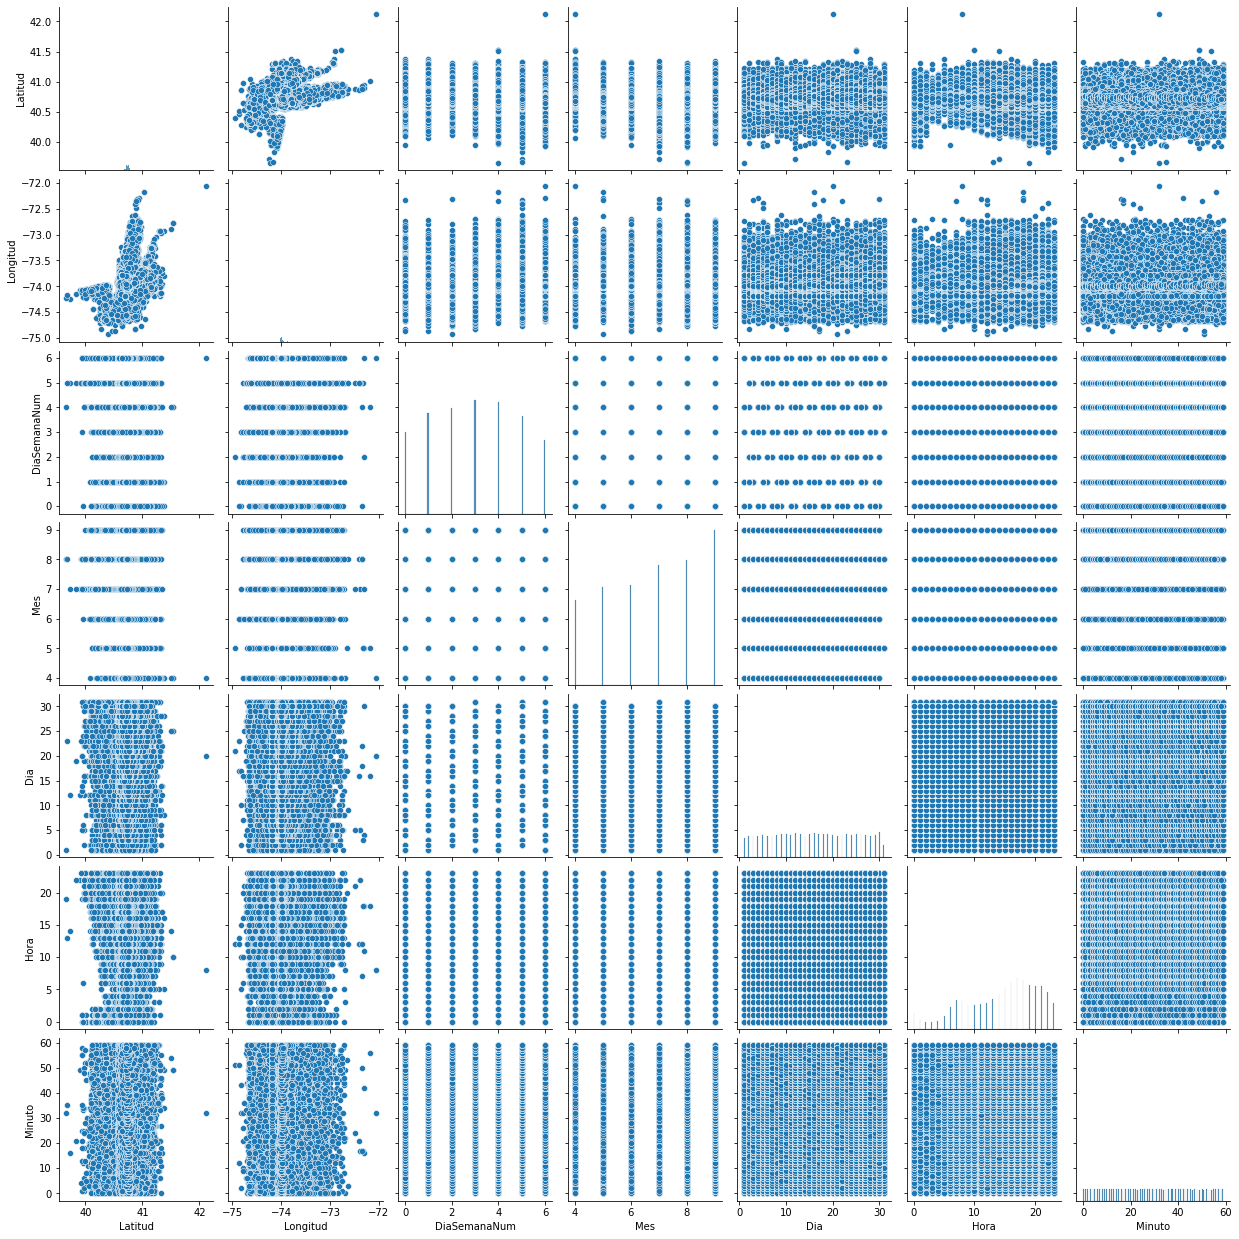

In [61]:
sns.pairplot(df_travels_ubers_2014_clean_filtered);

e:\users\dmorga\miniconda3\envs\bedu_ambiente\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



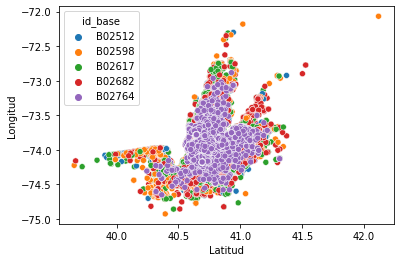

In [62]:
ax = sns.scatterplot(df_travels_ubers_2014_clean['Latitud'], df_travels_ubers_2014_clean['Longitud'], hue=df_travels_ubers_2014_clean['id_base']);
ax.set_title('Total de viajes acumulados por mes')


e:\users\dmorga\miniconda3\envs\bedu_ambiente\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

e:\users\dmorga\miniconda3\envs\bedu_ambiente\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



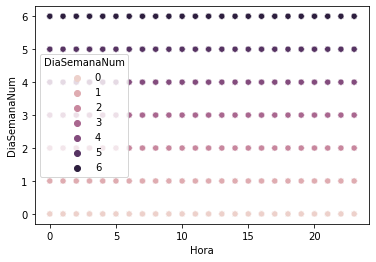

In [63]:
sns.scatterplot(df_travels_ubers_2014_clean['Hora'], df_travels_ubers_2014_clean['DiaSemanaNum'], hue=df_travels_ubers_2014_clean['DiaSemanaNum']);